# 마피아 게임

## 프로젝트 목표 및 내용

마피아, 경찰, 의사, 시민으로 구성된 기본 마피아 게임의 진행을 돕는다.<br>
<br>

<기본 룰 설명>

1. 마피아, 경찰, 의사, 시민으로 역할을 분배한다.<br>


2. '밤' 시간 동안 직업의 능력을 사용할 수 있다.<br>

    마피아: 특정 플레이어를 살해한다.<br>
    경찰:   특정 플레이어가 마피아인지 조사한다.<br>
    의사:   특정 플레이어의 살해를 막을 수 있다.<br>


3. '낮' 시간 동안 토론과 투표를 통해 한 플레이어를 처형한다.<br>


4. '밤'과 '낮'시간을 반복한다.<br>

    마피아가 모두 검거되는 순간 시민 팀의 승리로 게임이 끝난다.<br>
    마피아의 수가 시민 팀의 수보다 크거나 같으면 마피아의 승리로 게임이 끝난다.<br>

## 주제 선정 이유 또는 이 프로젝트의 필요성

마피아 게임에서 발생하는 불편을 보완하기 위해 이 주제를 선정했다.<br>


1. 진행자의 실수<br>
진행자는 플레이어들에게 직업을 부여하고 결과를 공지하는 절대적인 역할이다.<br>
따라서 진행자가 실수를 하거나 진행이 서툰 경우 게임의 재미가 줄어든다.<br>


2. 게임 참여 인원 확대<br>
진행자는 실질적으로 게임에 참여하지 않기 때문에 큰 흥미를 느끼기 어렵다.<br>
또한 진행자를 제외하고 역할을 부여해야 하기 때문에 더 많은 인원을 필요로 한다.<br>


3. 물리적 방해<br>
게임의 재미를 반감시키는 것에는 물리적인 요인도 있다.<br>
마피아 게임 중 '밤'시간에는 플레이어들이 개별적으로 진행자와의 소통한다.<br>
이 때 몸을 일으키면서 발생하는 바람 또는 옷 소리로 그 대상을 알아차릴 수 있다.<br>
이는 플레이어들이 심리전으로 마피아를 추리하는 것을 방해한다.<br>

이 프로그램으로 마피아 게임을 진행한다면 재미가 극대화될 것이다.

## 구현 내용 설명

처음에 플레이어 수, 마피아 수, 의사 수, 경찰 수를 입력받아 역할 리스트에 각 인원 수만큼 추가한다.<br>

이름을 입력받고 랜덤 함수로 각 플레이어들에게 역할을 부여하여 [이름, 역할, 0]의 형태로 리스트에 추가한다.<br>

플레이어들은 각자 이름을 입력해 자신의 직업을 확인한다.<br>

반복문을 사용하여 마피아의 수가 시민의 수보다 적은 동안 낮과 밤을 진행한다.<br> 

처음에 시간을 3으로 설정하고 2로 나누었을 때의 몫이 n일차이고 나머지가 1이면 밤, 아니면 낮이다.

밤에는 각자 돌아가며 자신의 능력을 쓴다.<br>

[이름, 역할, 0]에서 마피아가 선택한 사람은 세 번째 값이 +1 되고, 의사가 선택한 사람은 -1이 된다.<br>

경찰이 선택한 사람은 마피아인지 아닌지 알 수 있다.<br>

시민은 타자 소리를 내기 위해 무의미한 입력을 받는다.<br>

모두 입력을 마치면 둘째 날 아침이 되고 리스트의 세 번째 값이 1이상인 사람은 밤 사이 동안 살해되어 전체 공개된다.<br>

낮에는 플레이어들끼리 투표하여 선정된 플레이어 한 명의 이름을 입력받고 처형한다.(탈락한다.)<br>

진행 도중 마피아의 수가 시민의 수보다 많거나 같아지면 마피아가 승리한다.<br>

마피아가 모두 탈락하면 그 즉시 시민의 승으로 게임이 종료된다.<br>

## 진행과정

소스코드를 작성하면서 몇 가지의 에러가 발생했다.<br>


1. list index out of range 오류<br>

        for num in range(num_players):
            if players[num][2] > 0:
                print('{} died last night.'.format(players[num][0]))
                num_players -= 1
                if players[num][1] == 'mafia':
                    num_mafias -= 1
            elif players[num][2] < 0:
                players[num][2] = 0
            players.remove([players[num][0], players[num][1], players[num][2]])
            
num가 range(num_players)에서 반복하고 있을 때<br>
players 리스트 내용을 삭제하여 players 리스트의 길이가 짧아졌고<br>
원하는 index에서 제대로 처리되지 않았다.<br>

이를 해결하고자 fail이라는 리스트를 하나 생성하였다.<br>
삭제하고자 하는 index번호를 fail에 저장하고<br>
reverse=True 로 정렬하여 뒤의 내용부터 삭제했다.<br>

        for num in range(num_players):
            if players[num][2] > 0:
                print('{} died last night.'.format(players[num][0]))
                num_players -= 1
                fail.append(num)
                if players[num][1] == 'mafia':
                    num_mafias -= 1
            elif players[num][2] < 0:
                players[num][2] = 0
                
        fail.sort(reverse = True)
        for i in range(len(fail)):
            num = fail[i]
            players.remove([players[num][0], players[num][1], players[num][2]])
            
            
2. 의도하지 않은 리스트 내용이 삭제되는 오류<br>

        chosen_player = input('Please enter the player name you want to execute: ')
        for num in range(num_players):
            if players[num][0] == chosen_player:
                fail.append(num)
                num_players -= 1
                if players[num][1] == 'mafia':
                    print('{} is a mafia.'.format(chosen_player))
                    num_mafias -= 1
                else:
                    print('{} isn\'t a mafia.'.format(chosen_player))
        players.remove([players[fail[0]][0], players[fail[0]][1], players[fail[0]][2]])
        
투표하여 한 명을 탈락시킬 때 fail 리스트에 해당 index를 입력하여 삭제하려고 하였으나<br>
의도하지 않은 내용이 삭제되었다.<br>

원인을 알아보니 전에 사용했던 fail 리스트가 남아있어서 전의 내용이 삭제되었다.<br>
이를 해결하기 위해 L.clear()를 사용하여 전의 내용을 비워 새로 입력하였다.

        fail.sort(reverse = True)
        for i in range(len(fail)):
            num = fail[i]
            players.remove([players[num][0], players[num][1], players[num][2]])
        fail.clear()
                    
        chosen_player = input('Please enter the player name you want to execute: ')
        for num in range(num_players):
            if players[num][0] == chosen_player:
                fail.append(num)
                num_players -= 1
                if players[num][1] == 'mafia':
                    print('{} is a mafia.'.format(chosen_player))
                    num_mafias -= 1
                else:
                    print('{} isn\'t a mafia.'.format(chosen_player))
        players.remove([players[fail[0]][0], players[fail[0]][1], players[fail[0]][2]])
        fail.clear()
        
        
3. 시민 팀이 승리했을 경우, 마피아 승리도 같이 출력되는 오류

        while num_mafias < num_players - num_mafias:

            if num_mafias == 0:
                print('Civil team wins!\nThere are no mafias in this town.')
                break
            
        print('Mafia wins!\nThe number of mafias is above the number of civil members.')
    
마피아의 수가 시민팀의 수보다 크거나 같아서 반복문을 빠져나온 경우, 마피아 승리가 잘 전달되었다.<br>
하지만 중간에 마피아가 모두 탈락하여 시민팀이 승리했을 때 시민팀의 승리가 전달되며 반복문을 빠져나오는데<br>
마피아의 승리가 한 번 더 전달되는 오류가 발생하였다.<br>

위의 문제를 해결하기 위해 마피아가 남아 있을 경우에만 마피아의 승리가 출력되도록 하였다.<br>

    if num_mafias > 0:
        print('Mafia wins!\nThe number of mafias is above the number of civil members.')

## 구현결과

1. 마피아의 수가 시민 팀의 수와 같아져 마피아가 승리한 상황

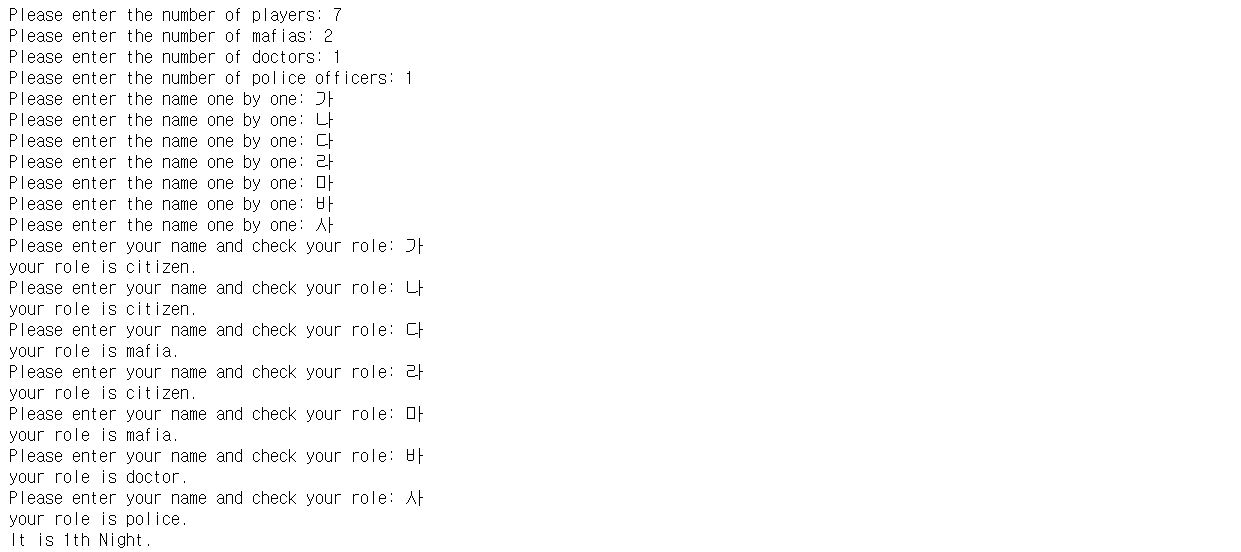

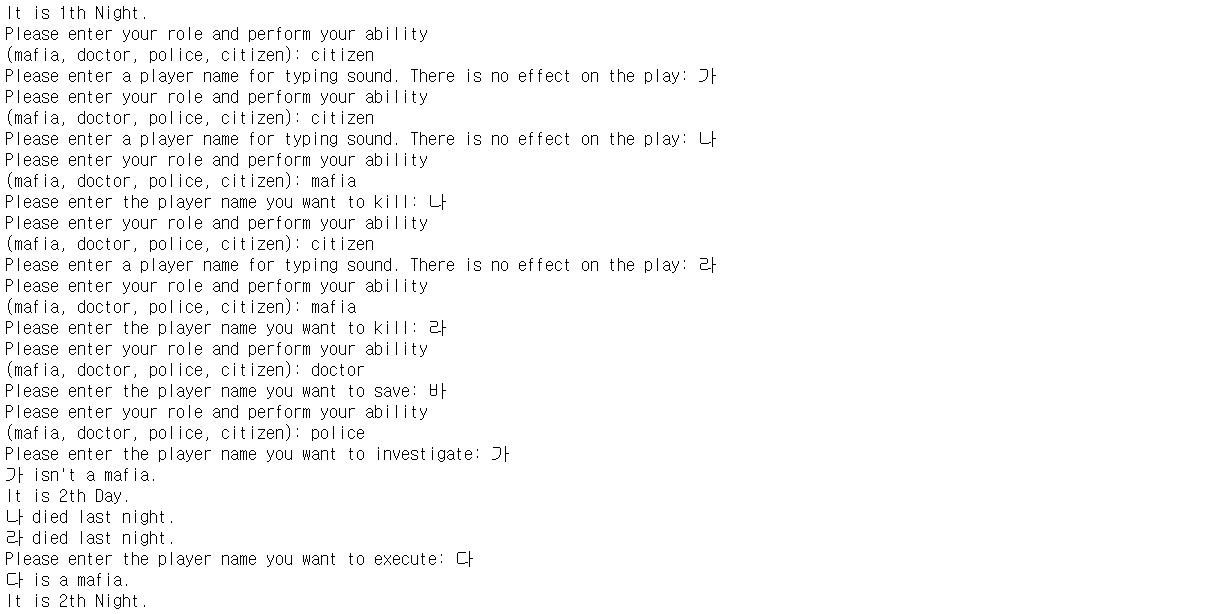

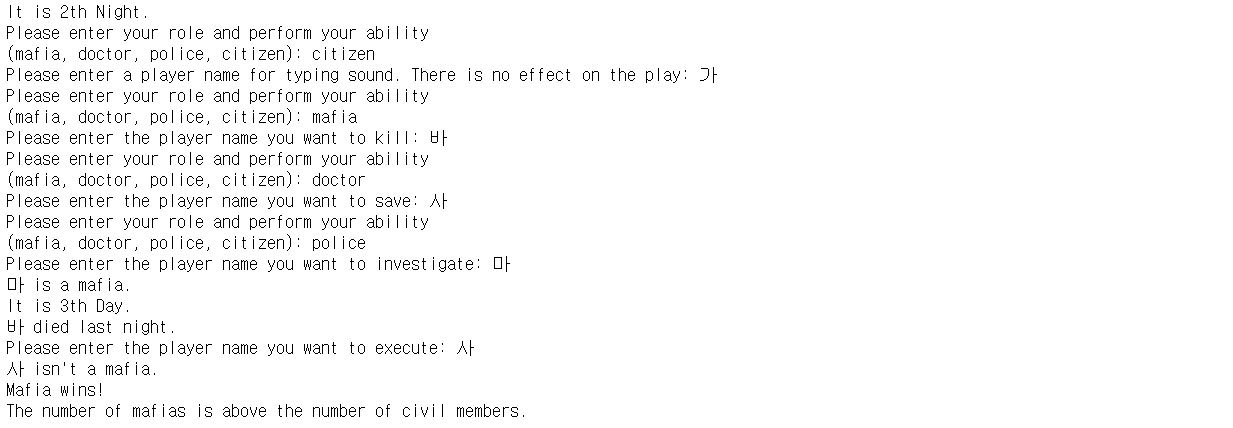

2. 마피아가 모두 탈락하여 시민 팀이 승리한 상황

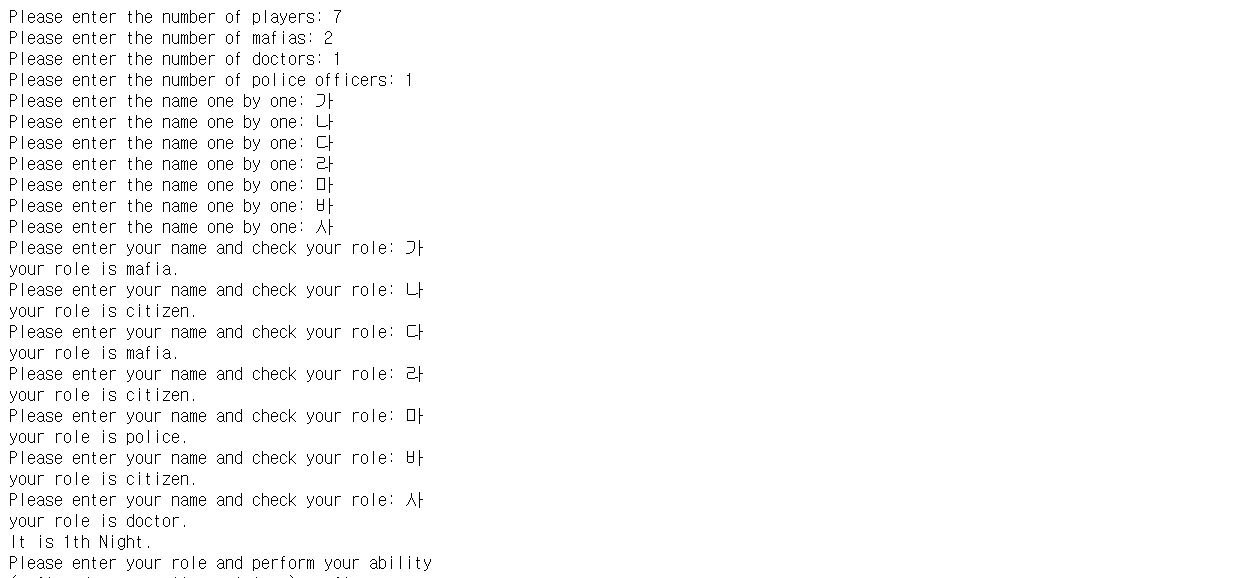

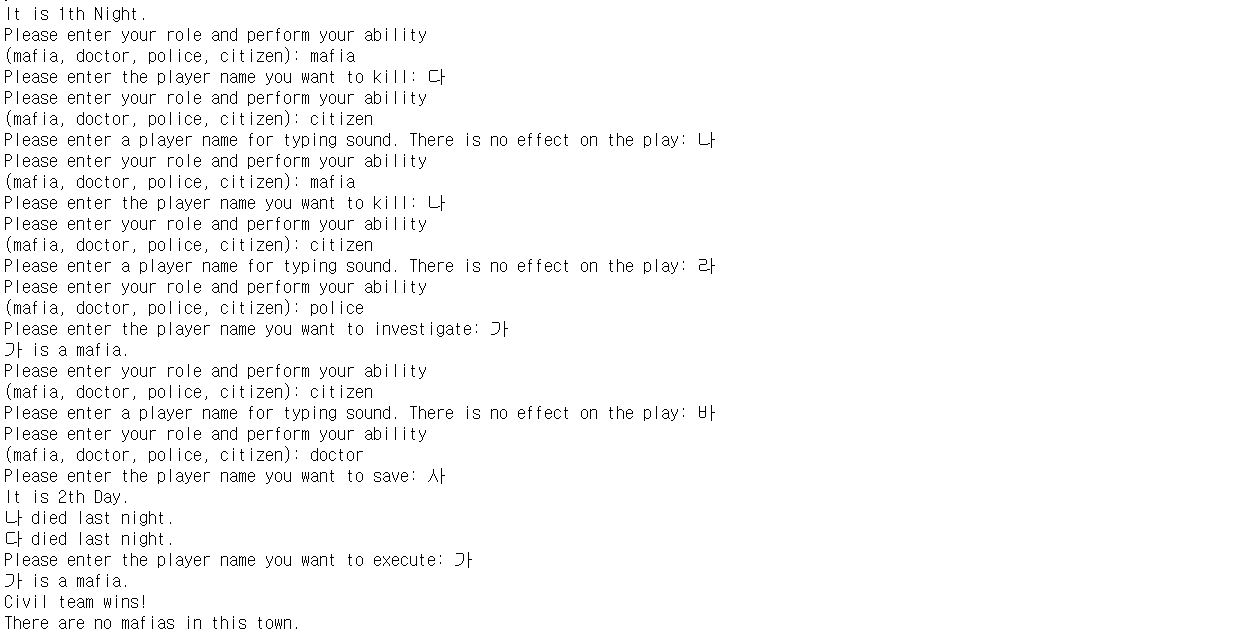

## 결론

각 인원을 설정하여 마피아 게임을 실행할 수 있는 소스코드를 만들었다.<br>

실제로 게임을 플레이하는 것에는 문제가 없으나 몇 가지 아쉬운 점이 있다.<br>

첫 번째는 각자 자신의 능력을 사용할 때 전의 기록이 남아있다는 것이다.<br>

긴 공백을 출력하여 위의 내용을 볼 수 없게 하는 것을 고안해봤지만<br>

비효율적이라는 생각이 들었다.<br>

또한 사용자가 철자를 잘못 적었을 경우 게임 진행이 원활하지 않을 수 있다.<br>
    
마지막으로는 투표하는 시간에 타이머를 사용하면 좋을 것 같다.<br>

투표를 하려고 토론을 하다보면 계속 길어져서 게임 진행이 원활하지 않을 수 있다.<br>

특정 시간을 타이머로 맞추고 시간 내에 토론을 진행하면 더 좋을 것 같다.<br>

## 참고문헌

파이썬 표준 라이브러리>>내장형
https://docs.python.org/ko/3.7/library/stdtypes.html?highlight=set#lists

파이썬 표준 라이브러리>>내장 함수
https://docs.python.org/ko/3/library/functions.html#len

파이썬 표준 라이브러리>>랜덤 함수
https://docs.python.org/ko/3/library/random.html?highlight=random#module-random

## 별첨: 직접 개발한 python 소스코드 원본

In [ ]:
import random

players = []
roles = []
fail = []
time = 3

num_players = int(input('Please enter the number of players: '))
num_mafias = int(input('Please enter the number of mafias: '))
num_doctors = int(input('Please enter the number of doctors: '))
num_police_officers = int(input('Please enter the number of police officers: '))
num_citizens = num_players - num_mafias - num_doctors - num_police_officers

for num in range(num_mafias):
    roles.append('mafia')
for num in range(num_doctors):
    roles.append('doctor')
for num in range(num_police_officers):
    roles.append('police')
for num in range(num_citizens):
    roles. append('citizen')

for num in range(num_players):
    name = input('Please enter the name one by one: ')
    role = random.choice(roles)
    players.append([name, role, 0])
    roles.remove(role)
    
for num in range(num_players):
    identity = input('Please enter your name and check your role: ')
    for i in range(num_players):
        if players[i][0] == identity:
            print('your role is {}.'.format(players[i][1]))
            

while num_mafias < num_players - num_mafias:
    
    if time % 2 == 1:
        print('It is {0}th {1}.'.format(time // 2, 'Night'))
        
        for num in range(num_players):
        
            ability = input('Please enter your role and perform your ability\n(mafia, doctor, police, citizen): ')
        
            if ability == 'mafia':
                chosen_player = input('Please enter the player name you want to kill: ')
                for num in range(num_players):
                    if players[num][0] == chosen_player:
                        players[num][2] += 1
                        
            elif ability == 'doctor':
                chosen_player = input('Please enter the player name you want to save: ')
                for num in range(num_players):
                    if players[num][0] == chosen_player:
                        players[num][2] -= 1
                        
            elif ability == 'police':
                chosen_player = input('Please enter the player name you want to investigate: ')
                for num in range(num_players):
                    if players[num][0] == chosen_player:
                        if players[num][1] == 'mafia':
                            print('{} is a mafia.'.format(chosen_player))
                        else:
                            print('{} isn\'t a mafia.'.format(chosen_player))
                            
            else:
                nothing = input('Please enter a player name for typing sound. There is no effect on the play: ')
                
        time += 1
        
        
    else:
        print('It is {0}th {1}.'.format(time // 2, 'Day'))
        
        for num in range(num_players):
            if players[num][2] > 0:
                print('{} died last night.'.format(players[num][0]))
                num_players -= 1
                fail.append(num)
                if players[num][1] == 'mafia':
                    num_mafias -= 1
            elif players[num][2] < 0:
                players[num][2] = 0
                
        if num_mafias == 0:
            print('Civil team wins!\nThere are no mafias in this town.')
            break
                    
        fail.sort(reverse = True)
        for i in range(len(fail)):
            num = fail[i]
            players.remove([players[num][0], players[num][1], players[num][2]])
        fail.clear()
                    
        chosen_player = input('Please enter the player name you want to execute: ')
        for num in range(num_players):
            if players[num][0] == chosen_player:
                fail.append(num)
                num_players -= 1
                if players[num][1] == 'mafia':
                    print('{} is a mafia.'.format(chosen_player))
                    num_mafias -= 1
                else:
                    print('{} isn\'t a mafia.'.format(chosen_player))
        players.remove([players[fail[0]][0], players[fail[0]][1], players[fail[0]][2]])
        fail.clear()
        if num_mafias == 0:
            print('Civil team wins!\nThere are no mafias in this town.')
            break
            
        time += 1
        
if num_mafias > 0:
    print('Mafia wins!\nThe number of mafias is above the number of civil members.')